### Gradient Descent

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
a = np.array([1,3,2,4])

In [12]:
a

array([1, 3, 2, 4])

In [13]:
type(a)

numpy.ndarray

In [14]:
A = np.array([[3,1,2],
             [2,3,4]])
B = np.array([[0,1],
              [2,3],
              [4,5]])

C = np.array([[0,1],
            [2,3],
            [4,5],
            [0,1],
            [2,3],
            [4,5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [15]:
A[0]

array([3, 1, 2])

In [16]:
C[2,0]

4

In [17]:
B[:, 0]

array([0, 2, 4])

In [18]:
df = pd.read_csv("./data/banknotes.csv")
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [19]:
import seaborn as sns

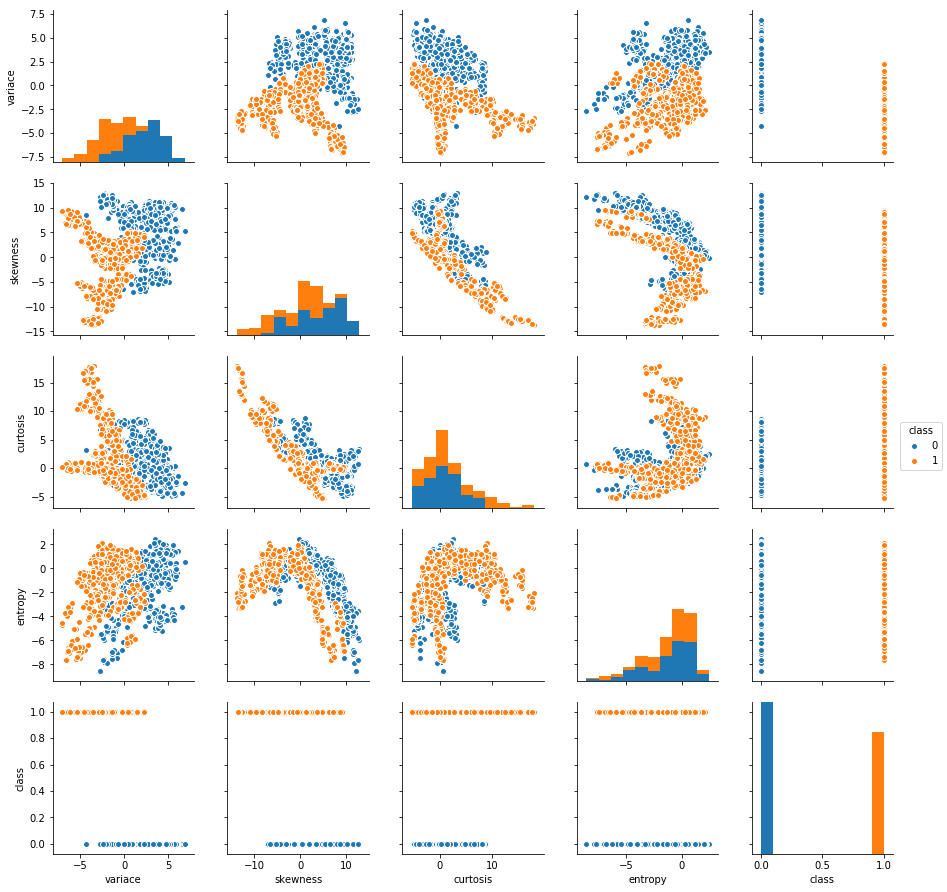

In [20]:
sns.pairplot(df, hue = 'class')

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [23]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [24]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.99124726,  0.99562363])

#### Logistic Regression Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [27]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [29]:
model.compile(loss = 'binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/1
343/343 [==============================] - 0s 91us/step


In [39]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.head()

,acc,loss
0,0.168124,1.196853


In [75]:
# Set figure width to 12 and height to 9
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

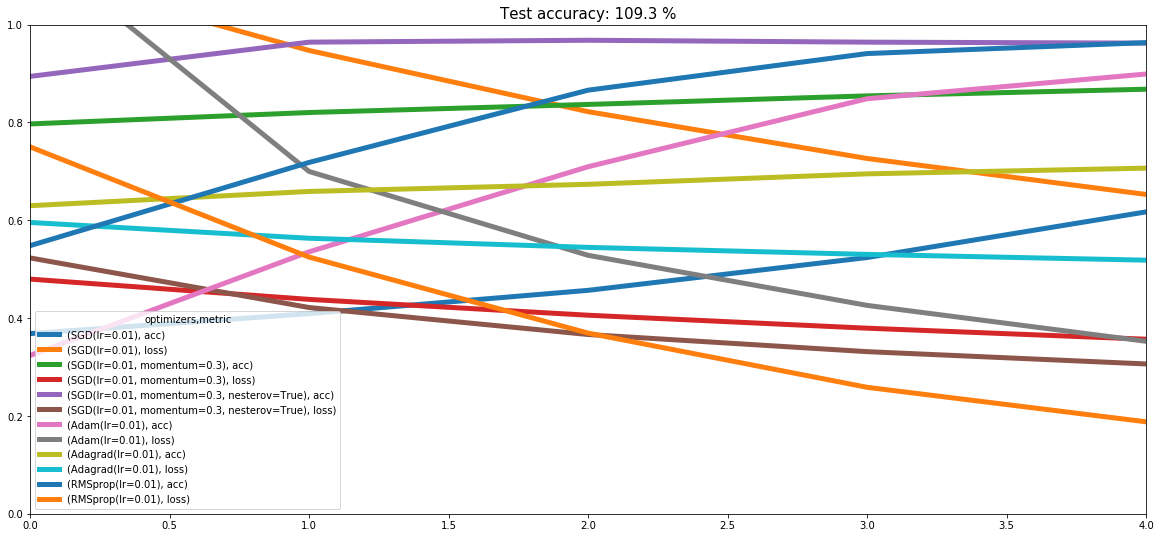

In [80]:
historydf.plot(ylim=(0,1), linewidth=5)
plt.title("Test accuracy: {:3.1f} %".format(result[0]*100), fontsize=15)

In [91]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [92]:
historydf = pd.concat(dflist, axis=1)
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.514091,0.732974,0.709427,0.579381,0.827988,0.410597,0.896016,0.272547


In [98]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [99]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.514091  0.732974  0.709427  0.579381  0.827988  0.410597   

learning_rate      0.50            
metric              acc      loss  
0              0.896016  0.272547

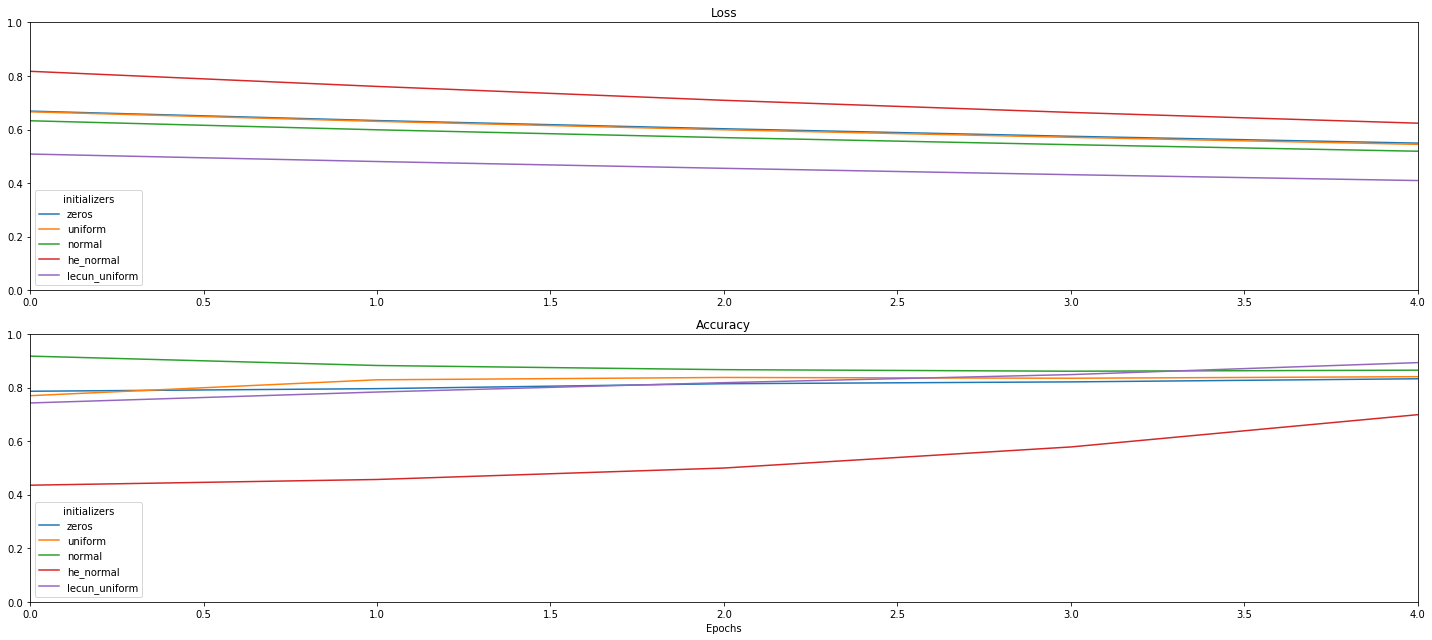

In [135]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [106]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [108]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [109]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.489796  0.815761  0.319728  0.992377  0.330418  1.568434   

batch_size       128           
metric           acc     loss  
0           0.524781  0.74695

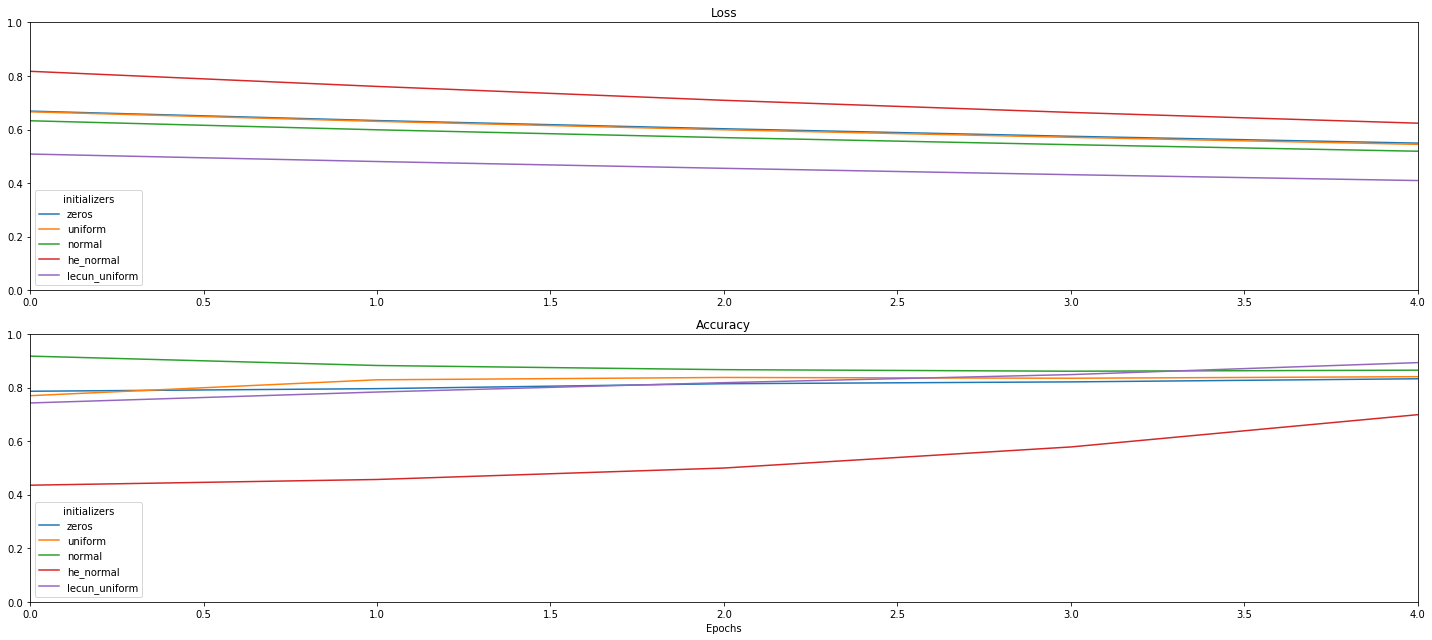

In [134]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

#### Optimizers

In [111]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [112]:
dflist = []
optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [113]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

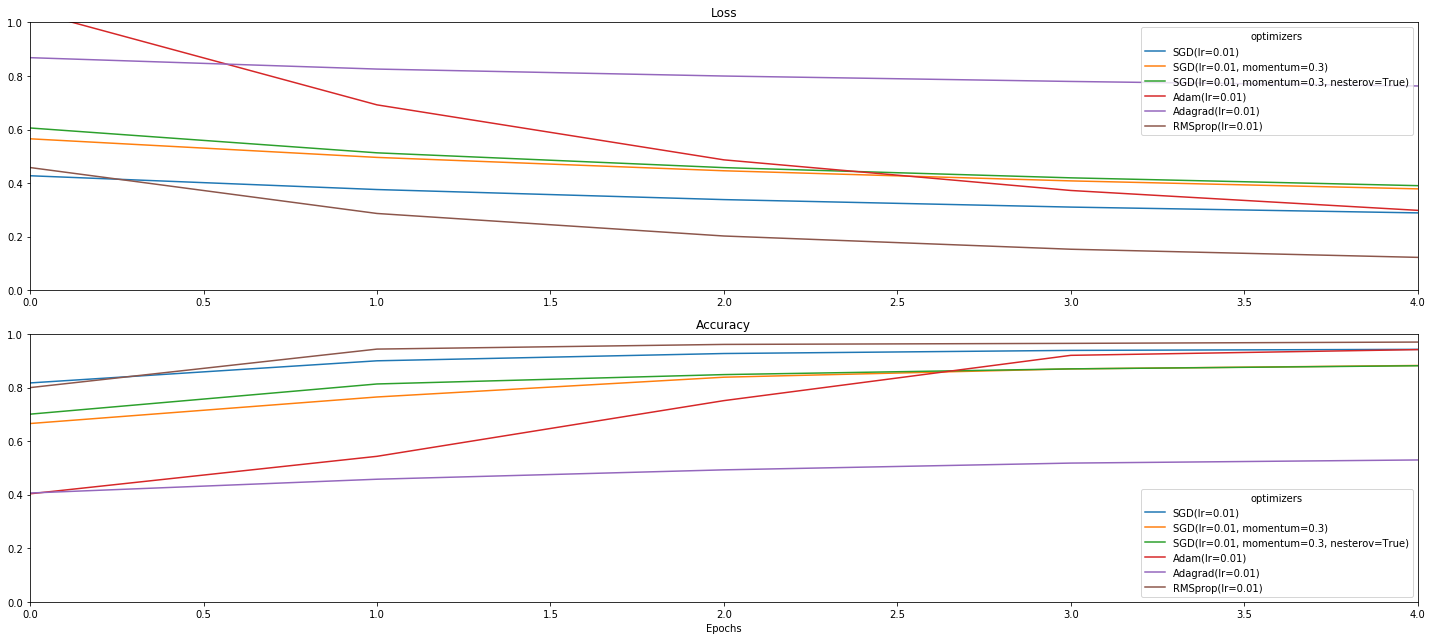

In [114]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [115]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [116]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

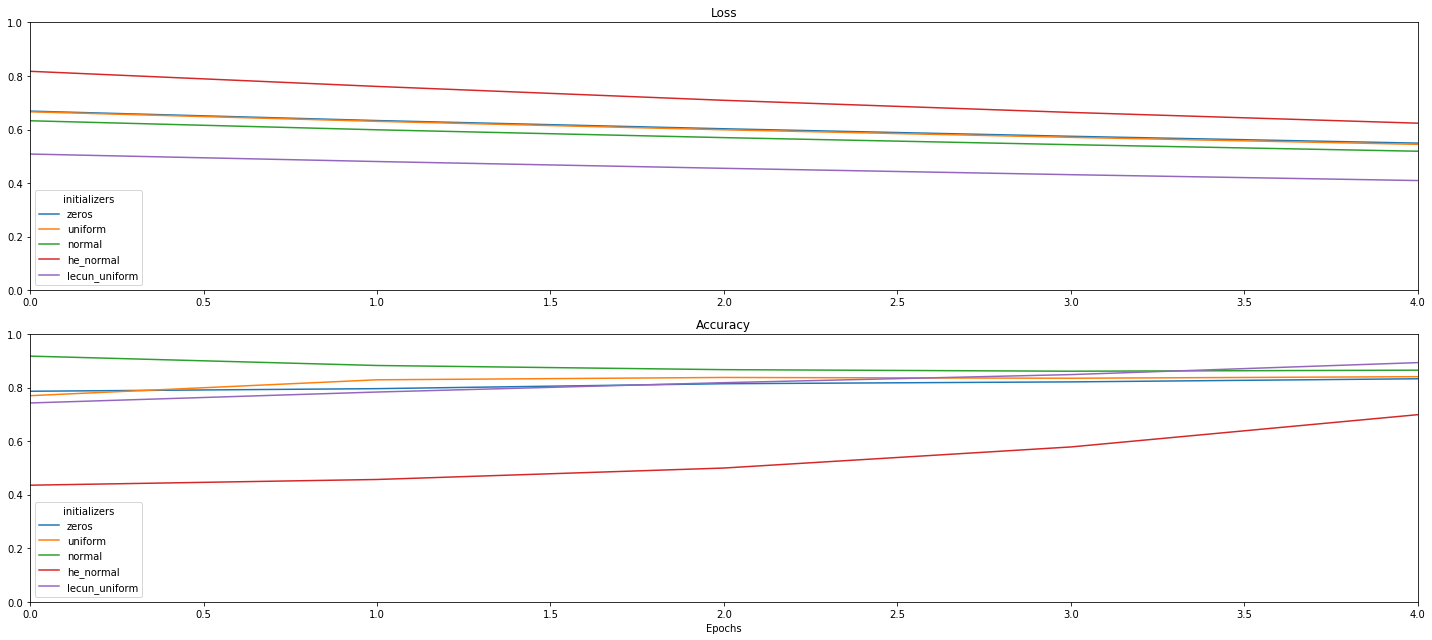

In [117]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [118]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 720 samples, validate on 309 samples
Epoch 1/20
720/720 [==============================] - 0s 568us/step - loss: 0.8037 - acc: 0.2875 - val_loss: 0.6891 - val_acc: 0.5016
Epoch 2/20
720/720 [==============================] - 0s 139us/step - loss: 0.6184 - acc: 0.7194 - val_loss: 0.5788 - val_acc: 0.7605
Epoch 3/20
720/720 [==============================] - 0s 126us/step - loss: 0.5207 - acc: 0.8125 - val_loss: 0.4736 - val_acc: 0.8285
Epoch 4/20
720/720 [==============================] - 0s 122us/step - loss: 0.4260 - acc: 0.8514 - val_loss: 0.3766 - val_acc: 0.8803
Epoch 5/20
720/720 [==============================] - 0s 124us/step - loss: 0.3370 - acc: 0.8972 - val_loss: 0.2879 - val_acc: 0.9191
Epoch 6/20
720/720 [==============================] - 0s 124us/step - loss: 0.2566 - acc: 0.9222 - val_loss: 0.2128 - val_acc: 0.9385
Epoch 7/20
720/720 [==============================] - 0s 128us/step - loss: 0.1909 - acc: 0.9444 - val_loss: 0.1524 - val_acc: 0.9741
Epoch 8/20
720/7

In [119]:
result

[0.041874347031985358, 0.98542274052478129]

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.layers

In [122]:
inp = model.layers[0].input
out = model.layers[0].output

In [123]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [126]:
features_function = K.function([inp], [out])
features_function

In [127]:
features = features_function([X_test])[0]

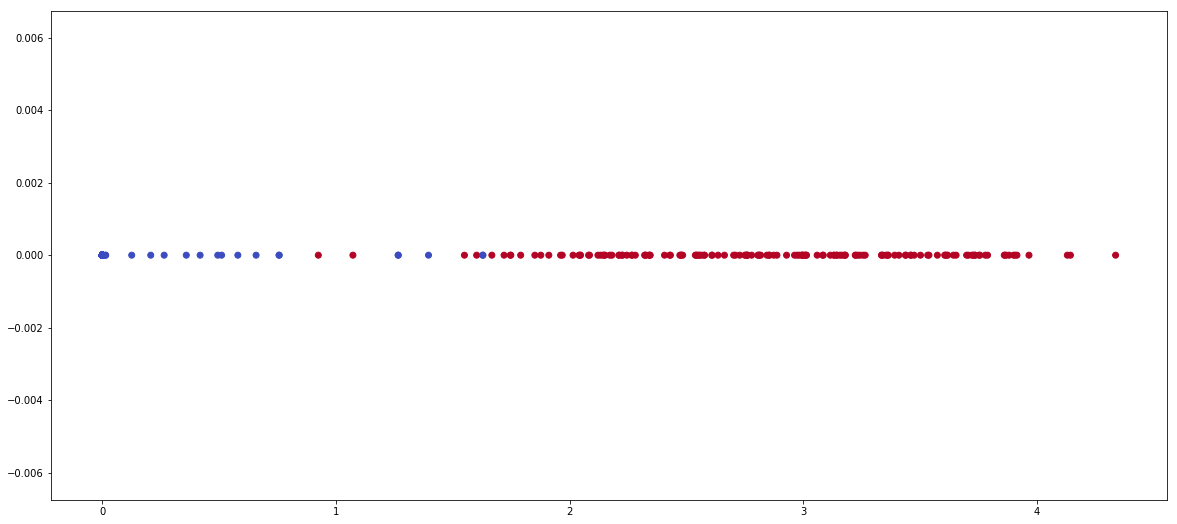

In [131]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [132]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

343/343 [==============================] - 0s 30us/step


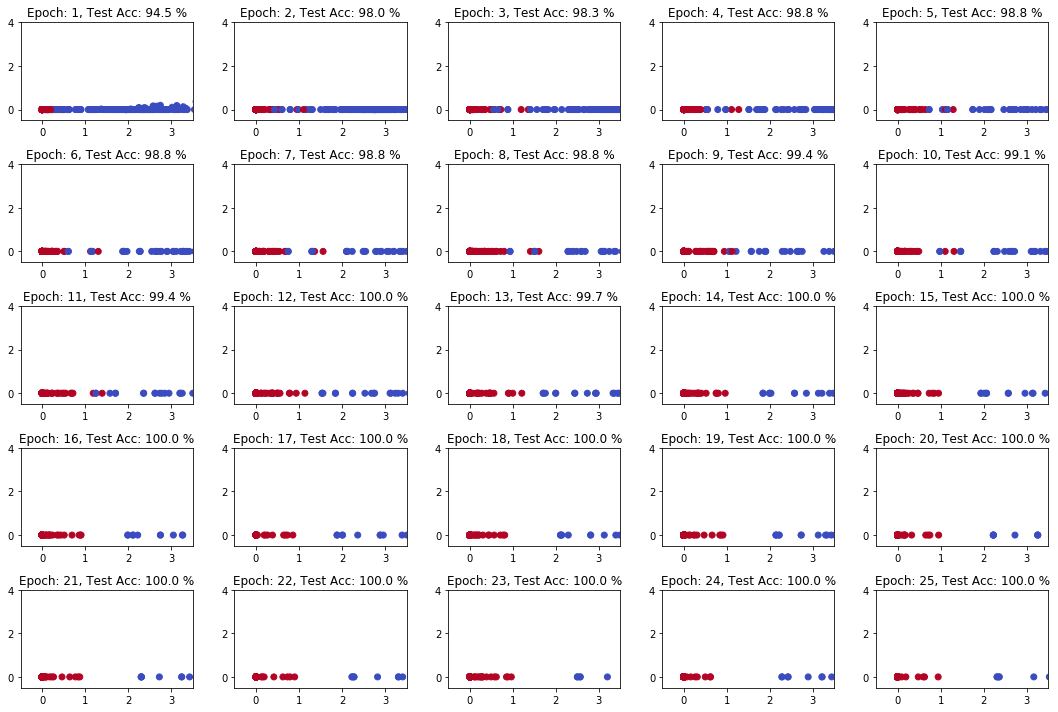

In [133]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()